In [22]:
!pip install MissForest
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from missforest.missforest import MissForest
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
df=pd.read_csv('/content/Deepression.csv')

In [24]:
df.describe()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy
count,813.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,407.000000,2.912963,2.777778,2.785185,2.964815,2.957407,2.777778,2.968519,2.964815,2.803704,2.979630,2.987037,2.964815,2.964815,2.924074
std,234.837178,1.738417,1.675610,1.680998,1.727402,1.740077,1.673394,1.719939,1.733834,1.655481,1.721185,1.708274,1.723100,1.733834,1.727163
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,407.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,610.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,813.000000,6.000000,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [25]:
df.head()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number             813 non-null    int64  
 1   Sleep              540 non-null    float64
 2   Appetite           540 non-null    float64
 3   Interest           540 non-null    float64
 4   Fatigue            540 non-null    float64
 5   Worthlessness      540 non-null    float64
 6   Concentration      540 non-null    float64
 7   Agitation          540 non-null    float64
 8   Suicidal Ideation  540 non-null    float64
 9   Sleep Disturbance  540 non-null    float64
 10  Aggression         540 non-null    float64
 11  Panic Attacks      540 non-null    float64
 12  Hopelessness       540 non-null    float64
 13  Restlessness       540 non-null    float64
 14  Low Energy         540 non-null    float64
 15  Depression State   540 non-null    object 
dtypes: float64(14), int64(1), 

In [27]:
df.shape

(813, 16)

In [28]:
df.isna().sum()

Number                 0
Sleep                273
Appetite             273
Interest             273
Fatigue              273
Worthlessness        273
Concentration        273
Agitation            273
Suicidal Ideation    273
Sleep Disturbance    273
Aggression           273
Panic Attacks        273
Hopelessness         273
Restlessness         273
Low Energy           273
Depression State     273
dtype: int64

the number of missing data in dataset

In [29]:
mf=MissForest()
mod_df=mf.fit_transform(df,categorical=['Depression State'])

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

implement Missforest algorithm to alter the missing data with median or mean or frequency data using random forest model

In [30]:
#removing the number of rows from features
mod_df=mod_df.drop('Number ',axis=1)


In [31]:
#apply label encoder to target (Depression State)
le=LabelEncoder()
out_le=le.fit_transform(mod_df.loc[:,'Depression State'])


In [32]:
mod_df_2=mod_df.drop('Depression State',axis=1)


In [33]:
#change the categorical target with its label encoder one
mod_df_3=mod_df_2.assign(new_column=out_le)

In [34]:
mod_df_3

,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,new_column
0,1.000000,1.000000,1.000000,5.000000,5.000000,1.000000,5.000000,5.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6
1,2.000000,5.000000,5.000000,1.000000,1.000000,5.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7
2,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,9
3,1.000000,1.000000,1.000000,5.000000,5.000000,1.000000,5.000000,5.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,8
4,2.000000,5.000000,5.000000,1.000000,1.000000,5.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,5.016287,2.014247,1.993507,1.999384,1.997268,1.944061,2.010784,1.978514,1.935592,2.047251,1.995434,2.027148,2.056012,2.049647,7
809,5.016287,2.014247,1.993507,1.999384,1.997268,1.944061,2.010784,1.978514,1.935592,2.047251,1.995434,2.027148,2.056012,2.049647,7
810,5.016287,2.014247,1.993507,1.999384,1.997268,1.944061,2.010784,1.978514,1.935592,2.047251,1.995434,2.027148,2.056012,2.049647,7
811,5.016287,2.014247,1.993507,1.999384,1.997268,1.944061,2.010784,1.978514,1.935592,2.047251,1.995434,2.027148,2.056012,2.049647,7


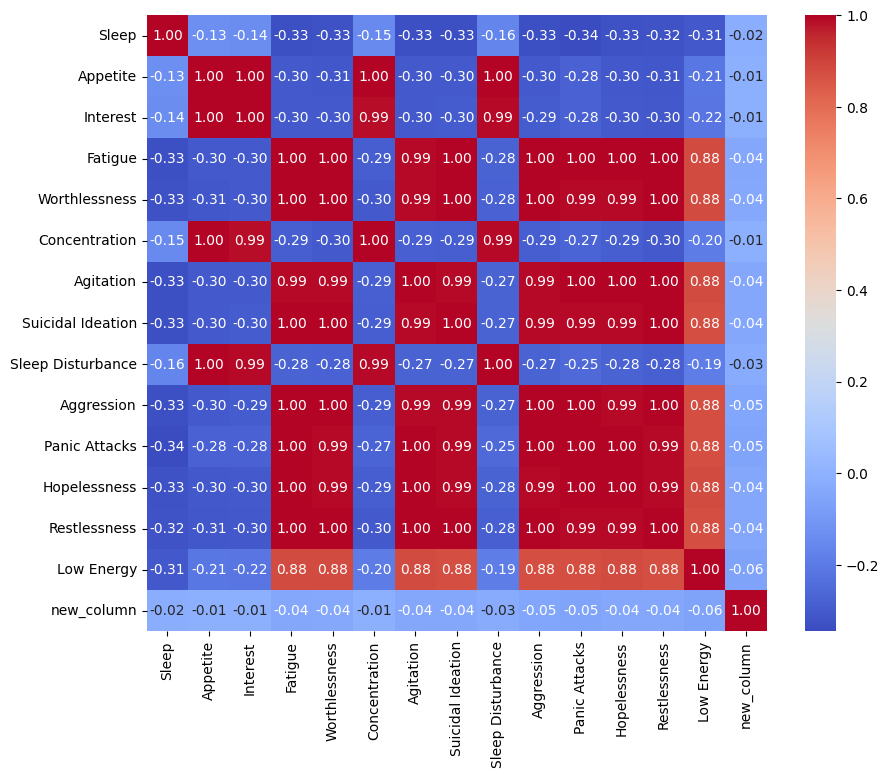

In [35]:
#plot the correlation matrix
plt.figure(figsize=(10, 8))
mod_df_3_corr=mod_df_3.corr()
sns.heatmap(mod_df_3_corr,annot=True,cmap='coolwarm', fmt=".2f")
plt.show()

In [36]:
#removing the not correlated features regard to target
not_corr=['Concentration','Interest','Appetite','Sleep']
corr_features=mod_df_3.columns[~mod_df_3.columns.isin(not_corr) ]


In [37]:
mod_df_4=mod_df_3.loc[:,corr_features]

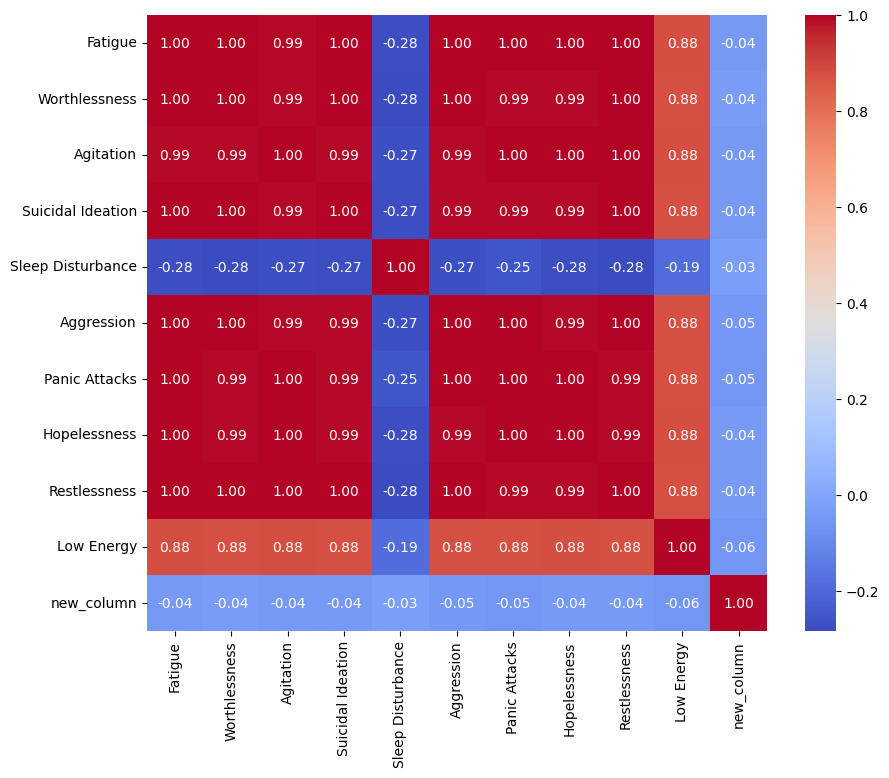

In [38]:
plt.figure(figsize=(10, 8))
mod_df_4_corr=mod_df_4.corr()
sns.heatmap(mod_df_4_corr,annot=True,cmap='coolwarm', fmt=".2f")
plt.show()

In [39]:
#define the feature and target
x=mod_df_4.loc[:,mod_df_4.columns != 'new_column']
y=mod_df_4.loc[:,'new_column']

In [40]:
#split dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [41]:
# define the XGBclassifier and AdaBoostclassifier
model={'XGBClassifier':XGBClassifier(),'AdaBoostClassifier':AdaBoostClassifier()}
predict1=[]
predict2=[]

for i,j in model.items():
    j.fit(x_train,y_train)
    if i=='XGBClassifier':
       predict1.append(j.predict(x_test))
    else:
      predict2.append(j.predict(x_test))
predict1=np.array(predict1).reshape(-1,1)
predict2=np.array(predict2).reshape(-1,1)

In [42]:
#define the accuracy for both models
score_xgb =accuracy_score(np.array(predict1).reshape(-1,1), y_test)
score_ada=accuracy_score(np.array(predict2).reshape(-1,1), y_test)

In [43]:
print(f'XGBoostclassifier score is {score_xgb } and the AdaBoostclassifier score is {score_ada}')

XGBoostclassifier score is 0.5487804878048781 and the AdaBoostclassifier score is 0.5487804878048781


In [44]:
#obtain the model performance report for both models
report_xgb = classification_report(predict1, y_test)
report_ada=classification_report(predict2, y_test)
cm_xgb = confusion_matrix(predict1, y_test)
cm_ada=confusion_matrix(predict2, y_test)

In [45]:
print(report_xgb )

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           6       0.29      0.83      0.43         6
           7       0.72      1.00      0.84        28
           8       0.77      0.25      0.38        40
           9       0.22      0.33      0.27         6

    accuracy                           0.55        82
   macro avg       0.25      0.30      0.24        82
weighted avg       0.66      0.55      0.52        82



In [46]:
print(report_ada)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           6       0.29      0.56      0.38         9
           7       0.79      0.76      0.77        41
           8       0.31      0.31      0.31        13
           9       0.56      0.26      0.36        19

    accuracy                           0.55        82
   macro avg       0.28      0.27      0.26        82
weighted avg       0.61      0.55      0.56        82



In [47]:
#change the labels back into categorical values
labels_xgb = le.inverse_transform(predict1)
labels_ada = le.inverse_transform(predict2)
labels_y_test=le.inverse_transform(y_test)

In [48]:
#plot the confusion matrix foe both models
cm_xgb = confusion_matrix(labels_xgb,labels_y_test)
cm_ada=confusion_matrix(labels_ada,labels_y_test)

<Axes: >

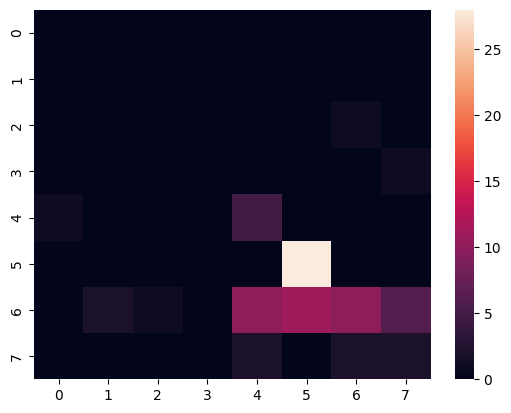

In [49]:
sns.heatmap(cm_xgb)

<Axes: >

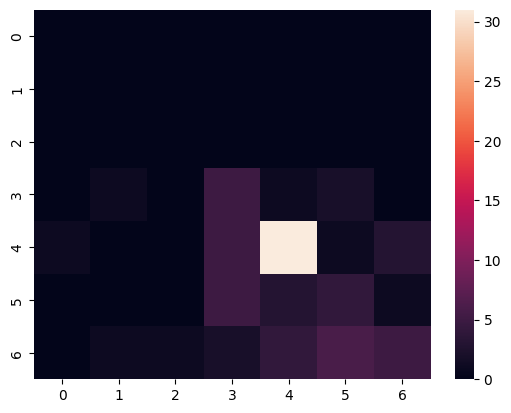

In [50]:
sns.heatmap(cm_ada)

In [78]:
#fine tuning the hyperparameters for XGBclassifier model
param_grid = {
    'n_estimators': [10,20,40,60,80,100,110],
     'max_depth': [2,3,4,5,6,7],
    'learning_rate': [0.01, 0.2,0.3,0.1,0.02,0.03]
}



# Set up GridSearchCV
grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=3,scoring='accuracy')

# Fit the GridSearchCV object
grid_search.fit(x_train,y_train)

# Get the best estimator
best_xgb = grid_search.best_estimator_

# Evaluate the best model
score = grid_search.best_score_
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ",score)


Best parameters found:  {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 10}
Best accuracy found:  nan


In [79]:
#fine tuning the hyperparameters for AdaBoost model
param_grid = {
    'n_estimators': [100,20,50, 80,110, 200],
    'learning_rate': [0.1, 0.2,0.3,0.01, 0.02,0.03]
}

# Create AdaBoost model
ada_model = AdaBoostClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV object
grid_search.fit(x_train, y_train)

# Get the best estimator
best_ada = grid_search.best_estimator_

# Evaluate the best model
best_score = grid_search.best_score_
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", best_score)

Best parameters found:  {'learning_rate': 0.2, 'n_estimators': 20}
Best accuracy found:  0.5717972070431087


In [86]:
#train the models with fine tuned hyperparameters
model={'XGBClassifier':XGBClassifier(learning_rate= 0.01,max_depth=3,n_estimators=100),'AdaBoostClassifier':AdaBoostClassifier(learning_rate=0.2,n_estimators=20)}
predict1=[]
predict2=[]

for i,j in model.items():
    j.fit(x_train,y_train)
    if i=='XGBClassifier':
       predict1.append(j.predict(x_test))
    else:
      predict2.append(j.predict(x_test))
predict1=np.array(predict1).reshape(-1,1)
predict2=np.array(predict2).reshape(-1,1)

In [87]:
#model performance with fine tuned hyperparmeters
report_xgb = classification_report(predict1, y_test)
report_ada=classification_report(predict2, y_test)
cm_xgb = confusion_matrix(predict1, y_test)
cm_ada=confusion_matrix(predict2, y_test)

In [88]:
print(report_xgb )

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           6       0.24      0.80      0.36         5
           7       0.79      0.89      0.84        35
           8       0.54      0.35      0.42        20
           9       0.67      0.32      0.43        19

    accuracy                           0.59        82
   macro avg       0.28      0.29      0.26        82
weighted avg       0.64      0.59      0.58        82



In [66]:
print(report_ada)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           6       0.35      0.75      0.48         8
           7       0.90      0.65      0.75        54
           8       0.31      0.27      0.29        15
           9       0.33      0.60      0.43         5

    accuracy                           0.59        82
   macro avg       0.27      0.32      0.28        82
weighted avg       0.70      0.59      0.62        82



In [57]:
# prompt: give me the f_score for all parameter in para_grid in xgbclassifier

from sklearn.metrics import f1_score

# Initialize an empty list to store f1 scores
f1_scores = []
f1_score_train=[]
n_estimators= [20,40,60,80,100,110]
learning_rate= [0.1, 0.2,0.3,0.01,0.02,0.03]

for n,l in zip(n_estimators,learning_rate):

    # Create an XGBClassifier instance with the current parameters
    model = XGBClassifier(n_estimators=n,learning_rate=l)

    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Predict on the test data
    y_pred = model.predict(x_test)
    y_pred_train=model.predict(x_train)
    # Calculate the f1 score
    f1 = f1_score(y_test, y_pred,average='weighted')
    f1_train=f1_score(y_train,y_pred_train,average='weighted')
    # Append the f1 score to the list
    f1_scores.append(f1)
    f1_score_train.append(f1_train)





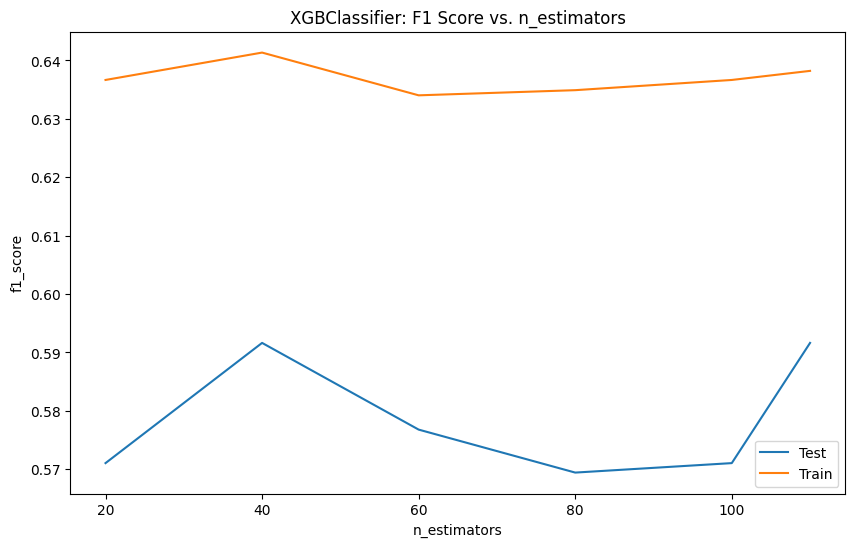

In [58]:
#plot the n_stimator and f1_score and f1_score_train

plt.figure(figsize=(10, 6))
plt.plot(n_estimators, f1_scores, label="Test")
plt.plot(n_estimators, f1_score_train, label="Train")
plt.xlabel("n_estimators")
plt.ylabel("f1_score")
plt.title("XGBClassifier: F1 Score vs. n_estimators")
plt.legend()
plt.show()


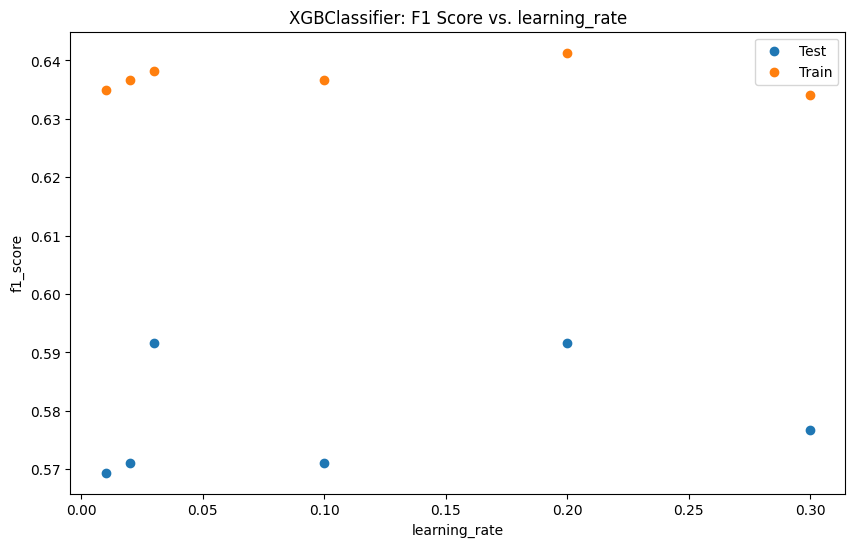

In [59]:
#plot the learning rate and f1_score and f1_score_train

plt.figure(figsize=(10, 6))
plt.scatter(learning_rate, f1_scores, label="Test")
plt.scatter(learning_rate, f1_score_train, label="Train")
plt.xlabel("learning_rate")
plt.ylabel("f1_score")
plt.title("XGBClassifier: F1 Score vs. learning_rate")
plt.legend()
plt.show()


In [89]:
model=XGBClassifier(learning_rate= 0.01,max_depth=3,n_estimators=100)
model.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

<Axes: >

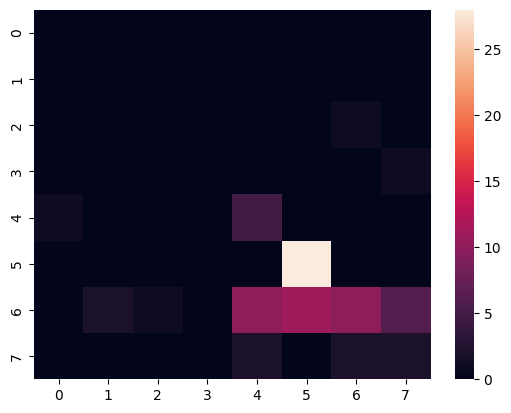

In [90]:
cm_xgb = confusion_matrix(labels_xgb,labels_y_test)
sns.heatmap(cm_xgb)

In [91]:
#take the input from user for prediction
features=corr_features[:-1]
frequency=list(map(int,input('enter the symptoms frequency :\n1: Never, 2: Always, 3: Often, 4: Rarely, 5: Sometimes, 6: Not at all).').split(',')))
dic={}
for k,v in zip(features,frequency):
    dic[k]=v

enter the symptoms frequency :
1: Never, 2: Always, 3: Often, 4: Rarely, 5: Sometimes, 6: Not at all).1,2,3,4,5,6,5,4,3,2


In [92]:
dic

{'Fatigue': 1,
 'Worthlessness': 2,
 'Agitation': 3,
 'Suicidal Ideation': 4,
 'Sleep Disturbance': 5,
 'Aggression': 6,
 'Panic Attacks': 5,
 'Hopelessness': 4,
 'Restlessness': 3,
 'Low Energy': 2}

In [93]:
diagnosis=model.predict(pd.DataFrame([dic]))

In [94]:
le.inverse_transform(diagnosis)

array(['Moderate'], dtype=object)